In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("notebook", font_scale=1.5)
%matplotlib inline

In [2]:
import kmeans_combined_revised, simulatedData, time
from kmeans_combined_revised import kmeansplusplus, kmeansparallel, kmeans
from simulatedData import generate_data

In [26]:
# test on simulated data
# set number of clusters
k=6
# set variance for simulation
R = 100
# set dimensions
d=15
# set number of points to generate
npoints = 10000
# generate data
sim_data = generate_data(k,R,d, npoints)

### Timings

In [27]:
# set parameters
k = 6
l=k*2
d = 15
r = 1

In [28]:
sim_data.shape

(10000, 15)

#### Timing selecting centers only

In [29]:
%timeit kmeansplusplus(sim_data, k, d)

1 loop, best of 3: 1.81 s per loop


In [31]:
%timeit kmeansparallel(sim_data, k, l, d, r)

1 loop, best of 3: 12.8 s per loop


#### Timing selecting centers and clustering

In [32]:
%timeit kmeans(sim_data, kmeansplusplus(sim_data, k, d), k, d)

1 loop, best of 3: 29.5 s per loop


In [34]:
%timeit kmeans(sim_data, kmeansparallel(sim_data, k, l, d, r), k, d)

1 loop, best of 3: 39.6 s per loop


### Clustering

In [88]:
sim_data_k6 = generate_data(k=6, var=100, dim=2, npoints=10000)

In [89]:
k = 6
l=k*2
d = 2
r = 1

In [90]:
sim_plus = kmeans(sim_data_k6, kmeansplusplus(sim_data_k6, k, d), k, d)

In [91]:
x_plus = sim_plus[0][:,0]
y_plus = sim_plus[0][:,1]
labels_plus = sim_plus[1]

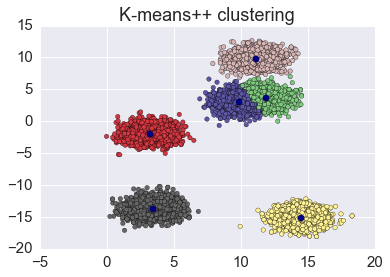

In [92]:
plt.figure()
plt.scatter(sim_data_k6[:,0], sim_data_k6[:,1], c=labels_plus, cmap='Accent')
plt.scatter(x_plus, y_plus, s=40, marker="o", c="darkblue")
plt.title("K-means++ clustering")
pass

In [93]:
sim_para = kmeans(sim_data_k6,kmeansparallel(sim_data_k6, k, l, d, r),k,d)

In [94]:
x_para = sim_para[0][:,0]
y_para = sim_para[0][:,1]
labels_para = sim_para[1]

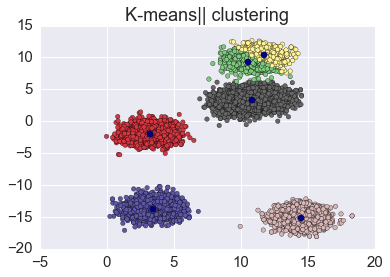

In [95]:
plt.figure()
plt.scatter(sim_data_k6[:,0], sim_data_k6[:,1], c=labels_para, cmap='Accent')
plt.scatter(x_para, y_para, s=40, marker="o", c="darkblue")
plt.title("K-means|| clustering")
pass

### old stuff from real data set

In [151]:
real_data=pd.read_csv('./data/spambase.data', header=None)

In [152]:
real_data.drop(real_data.columns[57], axis=1, inplace=True)

In [153]:
real_data=np.array(real_data)
k=2
d=real_data.shape[1]
n=real_data.shape[0]

In [157]:
#normalize the data
colSums=np.sum(real_data,axis=0)
for col in range(d):
    real_data[:,col]=real_data[:,col]/colSums[col]

In [158]:
res_plus = kmeans(real_data,kmeansplusplus(real_data,k,d),k, d)

In [159]:
res_x_plus = res_plus[0][:,0]
res_y_plus = res_plus[0][:,1]
res_labels_plus = res_plus[1]

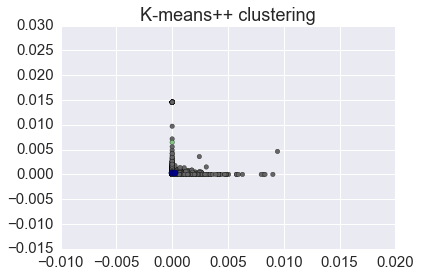

In [160]:
plt.figure()
plt.scatter(real_data[:,0], real_data[:,1], c=res_labels_plus, cmap='Accent')
plt.scatter(res_x_plus, res_y_plus, s=40, marker="o", c="darkblue")
plt.title("K-means++ clustering")
pass

In [162]:
res_para = kmeans(real_data,kmeansparallel(real_data, k, l, d, r),k,d)

In [163]:
res_x_para = res_para[0][:,0]
res_y_para = res_para[0][:,1]
res_labels_para = res_para[1]

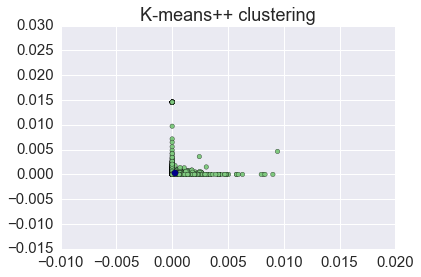

In [164]:
plt.figure()
plt.scatter(real_data[:,0], real_data[:,1], c=res_labels_para, cmap='Accent')
plt.scatter(res_x_para, res_y_para, s=40, marker="o", c="darkblue")
plt.title("K-means++ clustering")
pass